# Notes_Kernel_SVM

The Normal SVM can separate the Linearly separable data. But what about the Non-linear data?
- Here Kernel SVM come sinto picture

kernel SVM adds another dimension to the data to make it linearly separable.

How it does that ?
1. It maps the data to a higher dimension using a mapping function. we apply this function to all the data and then it'll (hopefully) be linearly separable.
2. Then we project the data back to the original dimensions and we will have the separator.

**But mapping the entire data to a higher dimension is computationally very heavy. Hence we will use a kernel Trick.**

### kernel Trick:
### $$Gaussian~/ Radial~basis~kernel ~K(\bar x, \bar l^i)  = exp\left( {- \frac{\|\bar x - \bar l^i \|^2}{2\sigma ^2}} \right)$$

where, 
* $x$ - point in our data
* $l$ - landmark
* $\sigma$ - a fixed parameter.

The figure below shows the visual representation of the gaussian kernel.

<img src="Gaussian_kernel_image.png">

So,
1. here the Red dot (🔴) represents the Landmark $l$.
2. the Crosses are our data points $x_i$.
3. so as we move closer to the landmark the term $\|\bar x - \bar l^i \|^2$ will reduce, hence the entire power term of $e$ will become close to zero and we know that  $e^0=1$. Hence as we move towards the landmark we will reach the top of the mountain.
4. And Vice-versa if we move away from the landmark we will reach the ground.

* We are going to use this Kernel Function to map the 2D data to 3rd Dimenion and there by separating our data so that it can be separable by a hyper plane.

<img src="kernel1.png">

using the $\sigma$ we will draw a circle at the base of the mountain and the values out side the circle will be zero.

So using this trick we will directly calculate the points position in the other dimension without actually going into the other dimension.

Hence by finding the right $\sigma$ we can setup the correct kernel function we can assign zero value to all the points we don't want in our classification and values above zero for the values that you do want in you classification and that will allow you to separate the two classes.

this is the kernel trick we have created a decision boundry without actually having to project all of our data points to a higher dimension.

using the kernel trick we are doing the computaion in the actual dimenion itself.

and we can also take two kernels simultaniosly which allows us to create a nonlinear decision boundry.

## Types of kernel functions:
<img src="kernel_functions.png">

# Non-Linear SVR

How do we build a SVR that will fit to a Non-Linear Data as we? - Thats where the Non-Linear SVR comes into picture.

1. We apply the kernel function on the data.
2. we map the points on the mountain in the higher dimension.
3. We fit the hyperplane to our data.
4. we project back the data to the original lower dimensions.

* In reality we use the Kernel Trick for drawing the svr boundry.

# Python Implementation

In [25]:
import pandas as pd
dataset = pd.read_csv("Social_Network_Ads.csv")
print(dataset.shape)
dataset.head()

(400, 3)


,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [2]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Checking for missing values

In [3]:
dataset.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

## Splitting the dataset

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train , y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Feature Scaling

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Training the Kernel SVM

In [6]:
from sklearn.svm import SVC
## kernel functions = [‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’]
svc = SVC(kernel="rbf", random_state=0)
svc.fit(X_train_scaled, y_train)

SVC(random_state=0)

## predicting the test results

In [7]:
import numpy as np
y_pred = svc.predict(X_test_scaled)
np.concatenate((y_test.reshape(len(y_test),1), y_pred.reshape(len(y_pred),1)), 1)

array([[0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0,

## Evaluating the Model

In [8]:
svc.score(X_test_scaled, y_test)

0.95

In [9]:
## Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
cm

array([[55,  3],
       [ 1, 21]], dtype=int64)

In [10]:
## Let's see the Accuracy of the model.
accuracy_score(y_test, y_pred)

0.95

## Hyper Parameter Tuning 

In [11]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1,1, 10, 100], 
              'gamma': [1,0.1,0.01,0.001],
              'kernel': ['rbf', 'poly', 'sigmoid']}

grid = GridSearchCV(svc, param_grid, refit=True, verbose=3)

grid.fit(X_train_scaled ,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.859, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.875, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.875, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.906, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.969, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ......... C=0.1, gamma=1, kernel=poly, score=0.781, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ......... 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] C=0.1, gamma=0.01, kernel=sigmoid ...............................
[CV] ... C=0.1, gamma=0.01, kernel=sigmoid, score=0.625, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=sigmoid ...............................
[CV] ... C=0.1, gamma=0.01, kernel=sigmoid, score=0.625, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=sigmoid ...............................
[CV] ... C=0.1, gamma=0.01, kernel=sigmoid, score=0.625, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=sigmoid ...............................
[CV] ... C=0.1, gamma=0.01, kernel=sigmoid, score=0.625, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.609, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.625, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.625, total=   0.0s
[CV] 

[CV] .... C=1, gamma=0.001, kernel=sigmoid, score=0.609, total=   0.0s
[CV] C=1, gamma=0.001, kernel=sigmoid ................................
[CV] .... C=1, gamma=0.001, kernel=sigmoid, score=0.625, total=   0.0s
[CV] C=1, gamma=0.001, kernel=sigmoid ................................
[CV] .... C=1, gamma=0.001, kernel=sigmoid, score=0.625, total=   0.0s
[CV] C=1, gamma=0.001, kernel=sigmoid ................................
[CV] .... C=1, gamma=0.001, kernel=sigmoid, score=0.625, total=   0.0s
[CV] C=1, gamma=0.001, kernel=sigmoid ................................
[CV] .... C=1, gamma=0.001, kernel=sigmoid, score=0.625, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........... C=10, gamma=1, kernel=rbf, score=0.844, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........... C=10, gamma=1, kernel=rbf, score=0.875, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] .

[CV] ......... C=100, gamma=1, kernel=poly, score=0.828, total=   0.1s
[CV] C=100, gamma=1, kernel=poly .....................................
[CV] ......... C=100, gamma=1, kernel=poly, score=0.781, total=   0.1s
[CV] C=100, gamma=1, kernel=poly .....................................
[CV] ......... C=100, gamma=1, kernel=poly, score=0.797, total=   0.1s
[CV] C=100, gamma=1, kernel=poly .....................................
[CV] ......... C=100, gamma=1, kernel=poly, score=0.844, total=   0.1s
[CV] C=100, gamma=1, kernel=poly .....................................
[CV] ......... C=100, gamma=1, kernel=poly, score=0.859, total=   0.2s
[CV] C=100, gamma=1, kernel=sigmoid ..................................
[CV] ...... C=100, gamma=1, kernel=sigmoid, score=0.688, total=   0.0s
[CV] C=100, gamma=1, kernel=sigmoid ..................................
[CV] ...... C=100, gamma=1, kernel=sigmoid, score=0.688, total=   0.0s
[CV] C=100, gamma=1, kernel=sigmoid ..................................
[CV] .

[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:    1.7s finished


GridSearchCV(estimator=SVC(random_state=0),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=3)

In [12]:
print(grid.best_estimator_)

SVC(C=1, gamma=1, random_state=0)


In [14]:
print(grid.best_params_)

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}


In [16]:
from sklearn.metrics import classification_report

grid_predictions = grid.predict(X_test_scaled)
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test, grid_predictions))

[[55  3]
 [ 1 21]]
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        58
           1       0.88      0.95      0.91        22

    accuracy                           0.95        80
   macro avg       0.93      0.95      0.94        80
weighted avg       0.95      0.95      0.95        80



In [19]:
svc2 = SVC(kernel="rbf",gamma= 1, C=1, random_state=0)

In [20]:
svc2.fit(X_train_scaled, y_train)
y_pred2 = svc2.predict(X_test_scaled)
print("COnfusion Metrix: \n", confusion_matrix(y_test, y_pred))
print("\nAccuracy: \n", accuracy_score(y_test, y_pred))

COnfusion Metrix: 
 [[55  3]
 [ 1 21]]

Accuracy: 
 0.95


## Visualising the Training set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


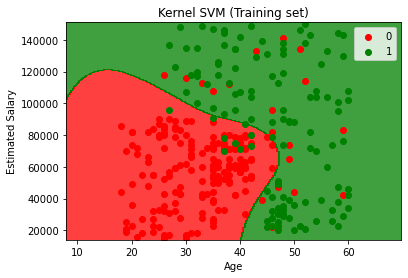

In [23]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
X_set, y_set = scaler.inverse_transform(X_train_scaled), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, svc2.predict(scaler.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Kernel SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Visualising the Test set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


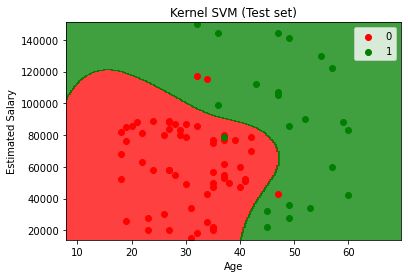

In [24]:
from matplotlib.colors import ListedColormap
X_set, y_set = scalerler.inverse_transform(X_test_scaled), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, svc2.predict(scaler.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Kernel SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()